In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from dpp.data import load_from_kaggle


In [189]:
dataset_link = "gagandeep16/car-sales" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw/car-sales' already exists with files. Skipping download (replace=False).


In [190]:
files

['Car_sales.csv']

In [191]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [192]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2),
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(157, 16)

'Description'

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.00,121.00,155.00,156.00,156.00,156.00,156.00,156.00,155.00,156.00,154.00,155.00
mean,53.00,18.07,27.39,3.06,185.95,107.49,71.15,187.34,3.38,17.95,23.84,77.04
std,68.03,11.45,14.35,1.04,56.70,7.64,3.45,13.43,0.63,3.89,4.28,25.14
min,0.11,5.16,9.24,1.00,55.00,92.60,62.60,149.40,1.90,10.30,15.00,23.28
25%,14.11,11.26,18.02,2.30,149.50,103.00,68.40,177.58,2.97,15.80,21.00,60.41
50%,29.45,14.18,22.80,3.00,177.50,107.00,70.55,187.90,3.34,17.20,24.00,72.03
75%,67.96,19.88,31.95,3.58,215.00,112.20,73.43,196.12,3.80,19.58,26.00,89.41
max,540.56,67.55,85.50,8.00,450.00,138.70,79.90,224.50,5.57,32.00,45.00,188.14


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
Manufacturer,object,0,30,"[Mitsubishi, Ford, Ford]"
Model,object,0,156,"[Ram Van, Park Avenue, RAV4]"
Sales_in_thousands,float64,0,157,"[88.028, 31.038, 16.957]"
__year_resale_value,float64,36,117,"[13.775, 19.925, 9.2]"
Vehicle_type,object,0,2,"[Passenger, Passenger, Car]"
Price_in_thousands,float64,2,152,"[19.39, 42.66, 39.665]"
Engine_size,float64,1,31,"[nan, 4.6, 1.8]"
Horsepower,float64,1,66,"[185.0, 126.0, 140.0]"
Wheelbase,float64,1,88,"[116.1, 109.9, 98.9]"
Width,float64,1,78,"[70.2, 76.4, 67.0]"


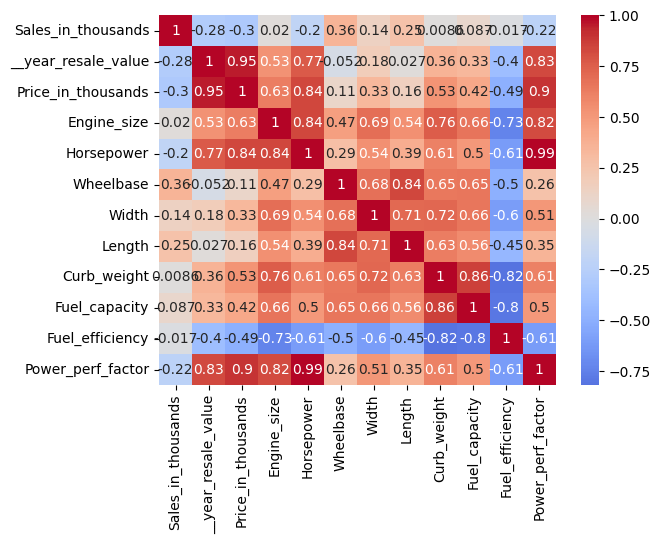

In [193]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0);

In [194]:
# Renaming __year_resale_value column
if "__year_resale_value" in df.columns:
    df.rename(columns={"__year_resale_value": "Year_resale_value"}, inplace=True)

In [195]:
# Modifying data types of object columns to categorical columns

category_col = ["Manufacturer","Model","Vehicle_type"]
for col in category_col:
    df[col] = df[col].astype("category")

df["Latest_Launch"] = pd.to_datetime(df["Latest_Launch"], errors = "coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Manufacturer        157 non-null    category      
 1   Model               157 non-null    category      
 2   Sales_in_thousands  157 non-null    float64       
 3   Year_resale_value   121 non-null    float64       
 4   Vehicle_type        157 non-null    category      
 5   Price_in_thousands  155 non-null    float64       
 6   Engine_size         156 non-null    float64       
 7   Horsepower          156 non-null    float64       
 8   Wheelbase           156 non-null    float64       
 9   Width               156 non-null    float64       
 10  Length              156 non-null    float64       
 11  Curb_weight         155 non-null    float64       
 12  Fuel_capacity       156 non-null    float64       
 13  Fuel_efficiency     154 non-null    float64       

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Manufacturer        157 non-null    category      
 1   Model               157 non-null    category      
 2   Sales_in_thousands  157 non-null    float64       
 3   Year_resale_value   121 non-null    float64       
 4   Vehicle_type        157 non-null    category      
 5   Price_in_thousands  155 non-null    float64       
 6   Engine_size         156 non-null    float64       
 7   Horsepower          156 non-null    float64       
 8   Wheelbase           156 non-null    float64       
 9   Width               156 non-null    float64       
 10  Length              156 non-null    float64       
 11  Curb_weight         155 non-null    float64       
 12  Fuel_capacity       156 non-null    float64       
 13  Fuel_efficiency     154 non-null    float64       

In [197]:
# Handling missing values in year_resale_value column
df["Year_resale_value"] = df["Year_resale_value"].fillna(df["Year_resale_value"].median())
df.describe().round(2)

,Sales_in_thousands,Year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
count,157.00,157.00,155.00,156.00,156.00,156.00,156.00,156.00,155.00,156.00,154.00,157,155.00
mean,53.00,17.18,27.39,3.06,185.95,107.49,71.15,187.34,3.38,17.95,23.84,2011-12-03 18:29:48.535031808,77.04
min,0.11,5.16,9.24,1.00,55.00,92.60,62.60,149.40,1.90,10.30,15.00,2008-02-13 00:00:00,23.28
25%,14.11,12.54,18.02,2.30,149.50,103.00,68.40,177.58,2.97,15.80,21.00,2011-07-07 00:00:00,60.41
50%,29.45,14.18,22.80,3.00,177.50,107.00,70.55,187.90,3.34,17.20,24.00,2011-12-10 00:00:00,72.03
75%,67.96,18.14,31.95,3.58,215.00,112.20,73.43,196.12,3.80,19.58,26.00,2012-06-02 00:00:00,89.41
max,540.56,67.55,85.50,8.00,450.00,138.70,79.90,224.50,5.57,32.00,45.00,2012-12-29 00:00:00,188.14
std,68.03,10.18,14.35,1.04,56.70,7.64,3.45,13.43,0.63,3.89,4.28,NaN,25.14


In [198]:
new_df = df[df["Price_in_thousands"].isna()]
new_df

,Manufacturer,Model,Sales_in_thousands,Year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.47,17.2,26.0,2012-01-04,NaN
33,Chrysler,Town & Country,53.480,19.540,Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-07-13,NaN


In [199]:
# Drop Chrysler Town & Country row
df = df.drop(index = 33)

# Fill Acura CL missing values with median
df["Price_in_thousands"] = df["Price_in_thousands"].fillna(df["Price_in_thousands"].median())
df["Power_perf_factor"] = df["Power_perf_factor"].fillna(df["Power_perf_factor"].median())

df.describe().round(2)

,Sales_in_thousands,Year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
count,156.00,156.00,156.00,156.00,156.00,156.00,156.00,156.00,155.00,156.00,154.00,156,156.00
mean,52.99,17.17,27.36,3.06,185.95,107.49,71.15,187.34,3.38,17.95,23.84,2011-12-04 16:36:55.384615424,77.01
min,0.11,5.16,9.24,1.00,55.00,92.60,62.60,149.40,1.90,10.30,15.00,2008-02-13 00:00:00,23.28
25%,14.04,12.53,18.08,2.30,149.50,103.00,68.40,177.58,2.97,15.80,21.00,2011-07-04 18:00:00,60.57
50%,29.21,14.18,22.80,3.00,177.50,107.00,70.55,187.90,3.34,17.20,24.00,2011-12-11 00:00:00,72.03
75%,68.07,17.89,31.94,3.58,215.00,112.20,73.43,196.12,3.80,19.58,26.00,2012-06-02 12:00:00,89.41
max,540.56,67.55,85.50,8.00,450.00,138.70,79.90,224.50,5.57,32.00,45.00,2012-12-29 00:00:00,188.14
std,68.25,10.21,14.31,1.04,56.70,7.64,3.45,13.43,0.63,3.89,4.28,NaN,25.06


In [200]:
new_df = df[df["Curb_weight"].isna()]
new_df

,Manufacturer,Model,Sales_in_thousands,Year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
15,Cadillac,Seville,15.943,27.1,Passenger,44.475,4.6,275.0,112.2,75.0,201.0,NaN,18.5,22.0,2011-04-29,115.621358


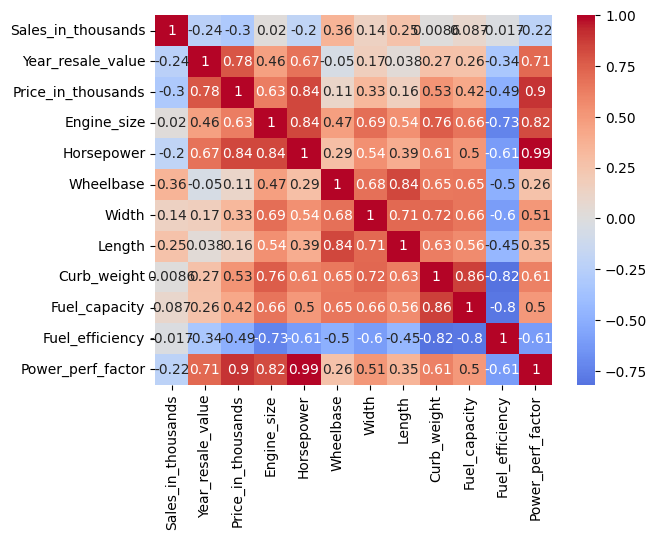

In [201]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0);

In [ ]:
# Linear Regression model to replace Curb_weight value
# Created a copy of the original DataFrame
df_linear_reg = df.copy()

# Choose predictors for Curb_weight
features = ["Length", "Width", "Engine_size", "Horsepower", "Wheelbase", "Fuel_capacity"]

# Split data using the *original* DataFrame (df) for training
train_data = df_linear_reg[df_linear_reg["Curb_weight"].notnull()]
test_data_indices = df_linear_reg[df_linear_reg["Curb_weight"].isnull()].index # Get indices of rows to impute

# Prepare training data
X_train = train_data[features]
y_train = train_data["Curb_weight"]

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Prepare test data using the indices of missing values from the original df
X_test = df_linear_reg.loc[test_data_indices, features]

# Predict missing Curb_weight
predicted_weights = model.predict(X_test)

# Update the 'Curb_weight' column in the *new* DataFrame ('df_linear_reg')
# using the indices identified earlier.
df_linear_reg.loc[test_data_indices, "Curb_weight"] = predicted_weights

# --- Display Results ---

# Print all rows in the new DataFrame where Curb_weight is now NOT null (which should be all rows)
print(df_linear_reg[["Manufacturer", "Model", "Curb_weight"]])

df_linear_reg.loc[15]


    Manufacturer    Model  Curb_weight
0          Acura  Integra        2.639
1          Acura       TL        3.517
2          Acura       CL        3.470
3          Acura       RL        3.850
4           Audi       A4        2.998
..           ...      ...          ...
152        Volvo      V40        3.042
153        Volvo      S70        3.208
154        Volvo      V70        3.259
155        Volvo      C70        3.601
156        Volvo      S80        3.600

[156 rows x 3 columns]


Manufacturer                     Cadillac
Model                             Seville
Sales_in_thousands                 15.943
Year_resale_value                    27.1
Vehicle_type                    Passenger
Price_in_thousands                 44.475
Engine_size                           4.6
Horsepower                          275.0
Wheelbase                           112.2
Width                                75.0
Length                              201.0
Curb_weight                      3.816319
Fuel_capacity                        18.5
Fuel_efficiency                      22.0
Latest_Launch         2011-04-29 00:00:00
Power_perf_factor              115.621358
Name: 15, dtype: object

In [ ]:
# Curb_weight replaced using median
# Create a copy of the original DataFrame to hold the results
df_median = df.copy()

# Calculate the median of the existing (notnull) 'Curb_weight' values.
df_median["Curb_weight"] = df_median["Curb_weight"].fillna(df_median["Curb_weight"].median())

# Display the rows that were imputed
df_median.loc[15]


Manufacturer                     Cadillac
Model                             Seville
Sales_in_thousands                 15.943
Year_resale_value                    27.1
Vehicle_type                    Passenger
Price_in_thousands                 44.475
Engine_size                           4.6
Horsepower                          275.0
Wheelbase                           112.2
Width                                75.0
Length                              201.0
Curb_weight                         3.342
Fuel_capacity                        18.5
Fuel_efficiency                      22.0
Latest_Launch         2011-04-29 00:00:00
Power_perf_factor              115.621358
Name: 15, dtype: object